In [1]:
from matplotlib import pyplot as plt
import numpy as np 

In [21]:
np.sum(boundary == 1)

np.int64(9)

Distance data shape: (256, 256)
Distance data range: 0.000 to 84.404
Zero distance points: 9 points
Distance statistics:
  Min: 0.000
  Max: 84.404
  Mean: 45.788
  Std: 17.930


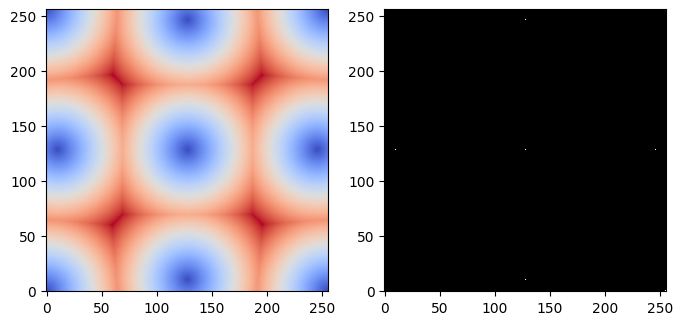

In [18]:
data = np.fromfile('pba_distances_2d.dat', dtype=np.float32).reshape((256, 256))
boundary = np.fromfile('boundary_mask_2d.dat', dtype=np.uint8).reshape((256, 256)) 
print(f"Distance data shape: {data.shape}")
print(f"Distance data range: {data.min():.3f} to {data.max():.3f}")
print(f"Zero distance points: {np.sum(data == 0)} points")

figs, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(data, cmap='coolwarm', origin='lower')

axs[1].imshow(boundary, cmap='grey', origin='lower')    

print(f"Distance statistics:")
print(f"  Min: {data.min():.3f}")
print(f"  Max: {data.max():.3f}")
print(f"  Mean: {data.mean():.3f}")
print(f"  Std: {data.std():.3f}")

Boundary data shape: (256, 256)
Boundary data type: uint8
Boundary value range: 0 to 1
Boundary points (value=1): 9 points
Non-boundary points (value=0): 65527 points

✓ Boundary data looks correct (only 0s and 1s)

Boundary point coordinates:
  Point 1: (0, 0)
  Point 2: (255, 0)
  Point 3: (128, 10)
  Point 4: (10, 128)
  Point 5: (128, 128)
  Point 6: (246, 128)
  Point 7: (128, 246)
  Point 8: (0, 255)
  Point 9: (255, 255)


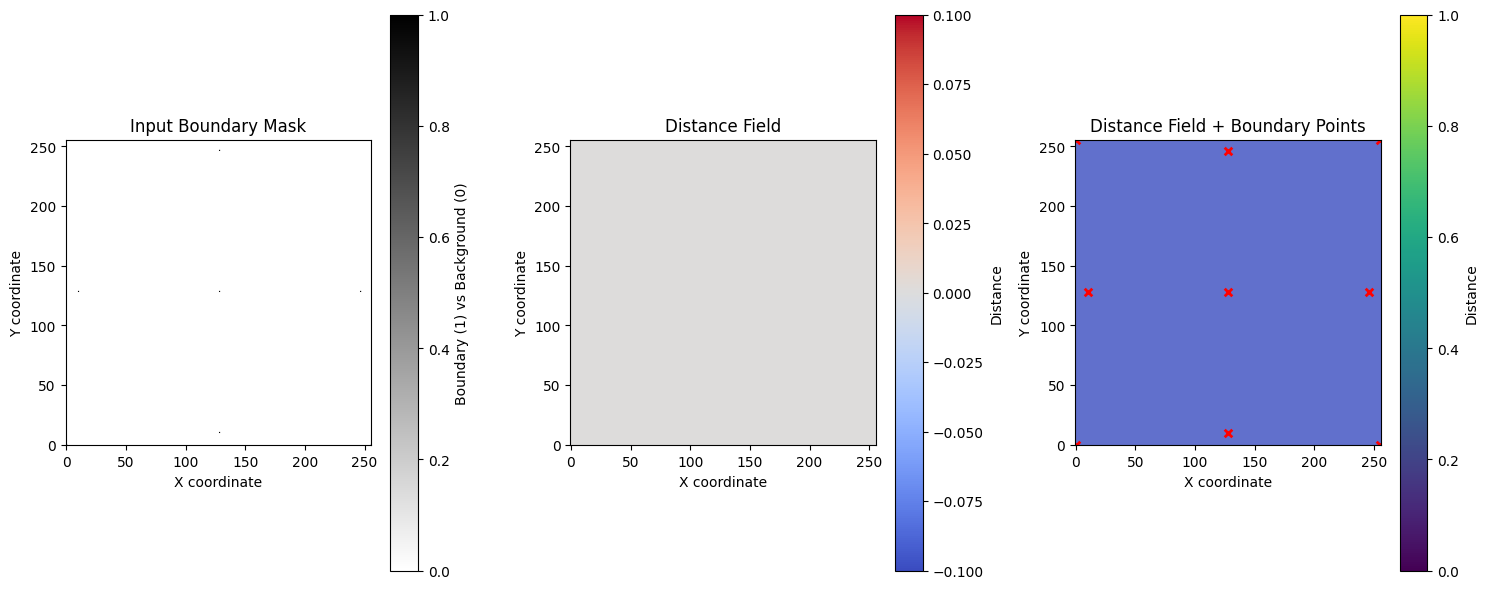

In [8]:
# Load and visualize the 2D input boundary mask
boundary = np.fromfile('boundary_mask_2d.dat', dtype=np.uint8).reshape((256, 256))
print(f"Boundary data shape: {boundary.shape}")
print(f"Boundary data type: {boundary.dtype}")
print(f"Boundary value range: {boundary.min()} to {boundary.max()}")
print(f"Boundary points (value=1): {np.sum(boundary == 1)} points")
print(f"Non-boundary points (value=0): {np.sum(boundary == 0)} points")
print()

# Verify the data makes sense
if boundary.min() >= 0 and boundary.max() <= 1 and set(np.unique(boundary)) <= {0, 1}:
    print("✓ Boundary data looks correct (only 0s and 1s)")
else:
    print("⚠ Warning: Boundary data contains unexpected values!")
    print(f"Unique values: {np.unique(boundary)}")

# Show boundary points coordinates
boundary_points = np.where(boundary == 1)
if len(boundary_points[0]) > 0:
    print(f"\nBoundary point coordinates:")
    for i in range(len(boundary_points[0])):
        y, x = boundary_points[0][i], boundary_points[1][i]
        print(f"  Point {i+1}: ({x}, {y})")

# Visualize boundary mask and distance field
plt.figure(figsize=(15, 6))

# Plot 1: Boundary mask
plt.subplot(1, 3, 1)
plt.imshow(boundary, cmap='binary', vmin=0, vmax=1, origin='lower')
plt.title('Input Boundary Mask')
plt.colorbar(label='Boundary (1) vs Background (0)')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')

# Plot 2: Distance field
plt.subplot(1, 3, 2)
im = plt.imshow(data, cmap='coolwarm', origin='lower')
plt.title('Distance Field')
plt.colorbar(label='Distance')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')

# Plot 3: Combined overlay
plt.subplot(1, 3, 3)
plt.imshow(data, cmap='coolwarm', alpha=0.8, origin='lower')
# Overlay boundary points in red
if len(boundary_points[0]) > 0:
    plt.scatter(boundary_points[1], boundary_points[0], c='red', s=30, marker='x', linewidth=2)
plt.title('Distance Field + Boundary Points')
plt.colorbar(label='Distance')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

# Assuming 'data' and 'boundary' are already defined in your code

# Find all boundary point locations
boundary_locs = np.where(boundary == 1)
print(f"Boundary points found: {len(boundary_locs[0])}")
print("Locations (y, x):")
for i in range(len(boundary_locs[0])):
    y, x = boundary_locs[0][i], boundary_locs[1][i]
    dist_at_point = data[y, x]
    print(f"  Point {i+1}: y={y}, x={x}, distance={dist_at_point:.6f}")

# Check if distances at boundary points are zero (they should be)
boundary_distances = data[boundary == 1]
print(f"\nValidation:")
print(f"All boundary points have distance 0: {np.all(boundary_distances == 0)}")
print(f"Max distance at boundary: {np.max(boundary_distances):.6f}")
print(f"Min distance at boundary: {np.min(boundary_distances):.6f}")

(array([  2,   2,   3,   4,   6,   6,  11,  14,  17,  17,  27,  29,  30,
         31,  33,  33,  36,  36,  38,  39,  41,  44,  47,  51,  51,  52,
         56,  57,  58,  61,  63,  66,  67,  69,  70,  70,  73,  74,  85,
         99, 101, 101, 103, 115, 116, 121, 122, 135, 140, 147, 148, 148,
        153, 160, 166, 167, 169, 169, 173, 176, 177, 178, 180, 180, 185,
        186, 190, 191, 194, 195, 198, 200, 201, 203, 204, 205, 206, 207,
        214, 215, 217, 218, 219, 220, 220, 222, 222, 223, 225, 225, 229,
        229, 233, 234, 234, 236, 236, 239, 245, 250]),
 array([ 70, 154,  72,  45,  77, 197, 187, 134, 131, 207, 185, 196, 243,
          6, 170, 211,  22,  77, 206,  99, 161, 232, 118,  84, 111, 176,
        134,  44,  73, 169,   1,  25, 233,  90,  20, 169,  82, 233,  12,
        155,  64, 192,  57, 243,  54,  84, 232, 250, 221,  55, 175, 253,
        189, 196, 209, 179,  89, 135,  54,  60,  43, 177,  66, 101,  37,
        165, 110, 174,   8, 108, 211,  10,  43,   0, 123, 175,  84, 1

In [ ]:
# Show zoomed-in regions around boundary points for detailed analysis
plt.figure(figsize=(15, 10))

# Define regions to examine (center around known boundary points)
regions = [
    (0, 0, 50, 50, "Top-left corner"),
    (206, 0, 256, 50, "Top-right corner"), 
    (0, 206, 50, 256, "Bottom-left corner"),
    (206, 206, 256, 256, "Bottom-right corner"),
    (118, 118, 138, 138, "Center region"),
    (118, 0, 138, 20, "Top edge center")
]

for i, (x1, y1, x2, y2, title) in enumerate(regions):
    # Boundary visualization
    plt.subplot(3, 6, i + 1)
    boundary_crop = boundary[y1:y2, x1:x2]
    plt.imshow(boundary_crop, cmap='binary', vmin=0, vmax=1, origin='lower')
    plt.title(f'Boundary: {title}')
    if i == 0:
        plt.ylabel('Boundary Mask')
    
    # Distance visualization
    plt.subplot(3, 6, i + 7)
    distance_crop = data[y1:y2, x1:x2]
    plt.imshow(distance_crop, cmap='coolwarm', origin='lower')
    plt.title(f'Distance: {title}')
    if i == 0:
        plt.ylabel('Distance Field')
    
    # Combined overlay
    plt.subplot(3, 6, i + 13)
    plt.imshow(distance_crop, cmap='coolwarm', alpha=0.8, origin='lower')
    # Overlay boundary points in red
    boundary_points_crop = np.where(boundary_crop == 1)
    if len(boundary_points_crop[0]) > 0:
        plt.scatter(boundary_points_crop[1], boundary_points_crop[0], c='red', s=20, marker='x')
    plt.title(f'Combined: {title}')
    if i == 0:
        plt.ylabel('Distance + Boundary')

plt.tight_layout()
plt.show()

# Print statistics for each region
print("\nRegion Statistics:")
for i, (x1, y1, x2, y2, title) in enumerate(regions):
    boundary_crop = boundary[y1:y2, x1:x2]
    distance_crop = data[y1:y2, x1:x2]
    n_boundary = np.sum(boundary_crop == 1)
    min_dist = np.min(distance_crop)
    max_dist = np.max(distance_crop)
    print(f"{title}: {n_boundary} boundary points, distance range [{min_dist:.2f}, {max_dist:.2f}]")

=== 2D EDT Results Analysis ===
Image size: (256, 256)
Total pixels: 65,536
Boundary points: 9
Boundary density: 0.0137%

Distance statistics:
  Min distance: 0.000
  Max distance: 84.404
  Mean distance: 45.788
  Std distance: 17.930
  Zero distance points: 9 (should equal boundary points)

Validation checks:
  All boundary points have distance 0: True
  Max distance at boundary points: 0.000000
  Min distance at non-boundary points: 1.000000

Distance pattern validation:
  Distance at center (128,128): 0.000
  Sample distances around boundary points:
    Point (0,0) relative to boundary (0,0): expected≈0.00, actual=0.000
    Point (1,0) relative to boundary (0,0): expected≈1.00, actual=1.000
    Point (0,1) relative to boundary (0,0): expected≈1.00, actual=1.000
    Point (1,1) relative to boundary (0,0): expected≈1.41, actual=1.414
    Point (254,0) relative to boundary (255,0): expected≈1.00, actual=1.000
    Point (255,0) relative to boundary (255,0): expected≈0.00, actual=0.000
 

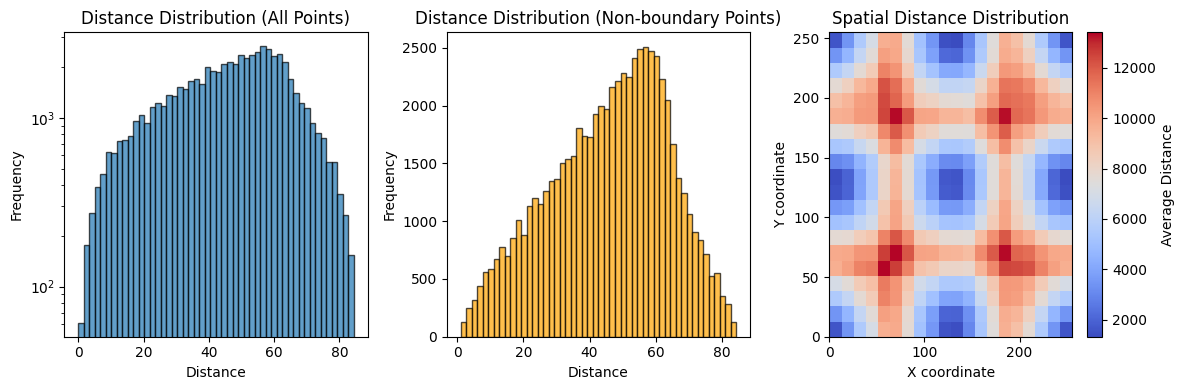

In [19]:
# Statistical analysis and validation for 2D EDT
print("=== 2D EDT Results Analysis ===")
print(f"Image size: {data.shape}")
print(f"Total pixels: {data.size:,}")
print(f"Boundary points: {np.sum(boundary == 1):,}")
print(f"Boundary density: {np.sum(boundary == 1) / data.size * 100:.4f}%")
print()

print("Distance statistics:")
print(f"  Min distance: {np.min(data):.3f}")
print(f"  Max distance: {np.max(data):.3f}")
print(f"  Mean distance: {np.mean(data):.3f}")
print(f"  Std distance: {np.std(data):.3f}")
print(f"  Zero distance points: {np.sum(data == 0):,} (should equal boundary points)")
print()

# Validation: All boundary points should have distance 0
boundary_distances = data[boundary == 1]
print("Validation checks:")
print(f"  All boundary points have distance 0: {np.all(boundary_distances == 0)}")
print(f"  Max distance at boundary points: {np.max(boundary_distances):.6f}")
if np.sum(boundary == 0) > 0:
    print(f"  Min distance at non-boundary points: {np.min(data[boundary == 0]):.6f}")

# Check for expected distance pattern
print("\nDistance pattern validation:")
# Check center point distance (should be distance to nearest boundary)
center_y, center_x = 128, 128
center_dist = data[center_y, center_x]
print(f"  Distance at center (128,128): {center_dist:.3f}")

# Check distances near boundary points
boundary_y, boundary_x = np.where(boundary == 1)
if len(boundary_y) > 0:
    print(f"  Sample distances around boundary points:")
    for i in range(min(3, len(boundary_y))):
        by, bx = boundary_y[i], boundary_x[i]
        # Check neighboring pixels
        for dy in [-1, 0, 1]:
            for dx in [-1, 0, 1]:
                ny, nx = by + dy, bx + dx
                if 0 <= ny < data.shape[0] and 0 <= nx < data.shape[1]:
                    expected_dist = np.sqrt(dy*dy + dx*dx)
                    actual_dist = data[ny, nx]
                    print(f"    Point ({nx},{ny}) relative to boundary ({bx},{by}): expected≈{expected_dist:.2f}, actual={actual_dist:.3f}")

# Distance distribution histogram
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(data.flatten(), bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Distance Distribution (All Points)')
plt.yscale('log')

plt.subplot(1, 3, 2)
# Exclude zero distances (boundary points) for better visualization
non_zero_distances = data[data > 0]
if len(non_zero_distances) > 0:
    plt.hist(non_zero_distances, bins=50, alpha=0.7, edgecolor='black', color='orange')
    plt.xlabel('Distance')
    plt.ylabel('Frequency')
    plt.title('Distance Distribution (Non-boundary Points)')
else:
    plt.text(0.5, 0.5, 'No non-zero distances found!\nCheck boundary mask generation.', 
             transform=plt.gca().transAxes, ha='center', va='center', fontsize=12, color='red')
    plt.title('Distance Distribution (Non-boundary Points)')

plt.subplot(1, 3, 3)
# 2D histogram to show spatial distribution of distances
plt.hist2d(np.arange(data.shape[1]).repeat(data.shape[0]), 
           np.tile(np.arange(data.shape[0]), data.shape[1]), 
           weights=data.flatten(), bins=20, cmap='coolwarm')
plt.colorbar(label='Average Distance')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Spatial Distance Distribution')

plt.tight_layout()
plt.show()

In [ ]:
# Verify the data dimensions
print(f"Data size: {data.size}")
print(f"Expected 2D size (256x256): {256*256}")
print(f"Ratio: {data.size / (256*256)}")
print(f"Data shape: {data.shape}")

# Double-check our data is loaded correctly
if data.size == 256*256:
    print("✓ Data loaded correctly as 2D array")
else:
    print("⚠ Warning: Data size mismatch!")
    
# Check if the issue is that all distances are actually zero
unique_values = np.unique(data)
print(f"Unique distance values: {unique_values}")
if len(unique_values) == 1 and unique_values[0] == 0:
    print("❌ Problem: All distances are zero!")
    print("This suggests either:")
    print("  1. All pixels are marked as boundary pixels")
    print("  2. The EDT algorithm has a bug")
    print("  3. The data file is not being written correctly")

256.0